<a href="https://www.kaggle.com/code/imharshkashyap/iris-flower-data-visualization-python?scriptVersionId=149287370" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(style="dark", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("/kaggle/input/iris-flower-visualization-using-python/Iris.csv") 
# the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

# Press shift+enter to execute this cell

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

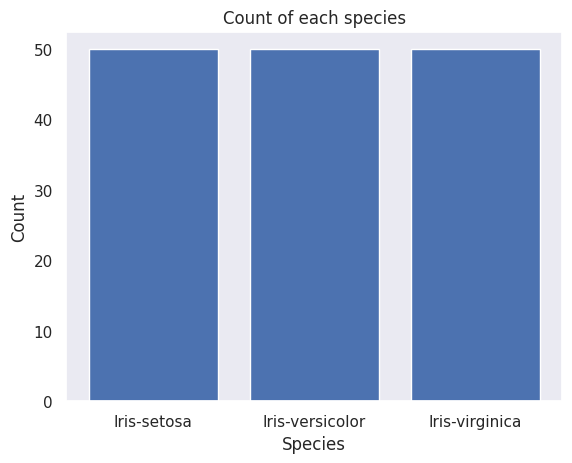

In [3]:
# Let's see how many examples we have of each species
import matplotlib.pyplot as plt

# Assuming we have a pandas DataFrame named 'iris' with a column 'Species'
species_counts = iris["Species"].value_counts()
#creat bar_chart
plt.bar(species_counts.index, species_counts.values)

#insert lable & title
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Count of each species")

#display chart
plt.show()

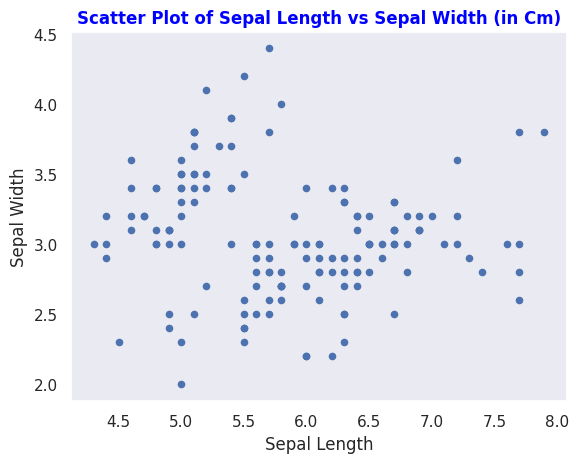

In [4]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

#insert lable & title
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
# title decoration
title_txt= "Scatter Plot of Sepal Length vs Sepal Width (in Cm)"
title_font={'fontsize': 12, 'fontweight':'bold','color': 'blue'}

plt.title(title_txt, fontdict=title_font)

#display 
plt.show()


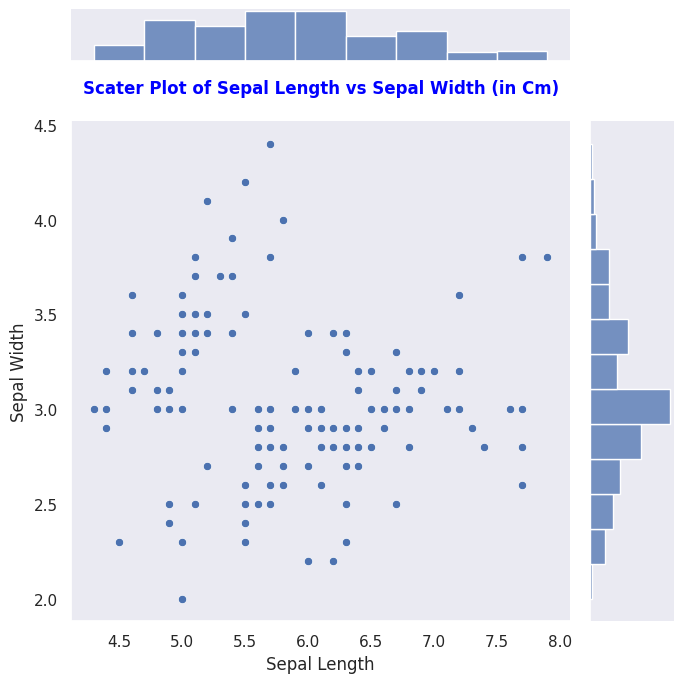

In [5]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sb.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=7)
plt.xlabel("Sepal Length")
title_txt="Scater Plot of Sepal Length vs Sepal Width (in Cm)"
plt.ylabel("Sepal Width")
plt.title(title_txt, title_font, pad=20)
# adjusting graph layout to avoid overlapping 
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Scater Plot of Sepal Length vs Sepal Width (in Cm)')

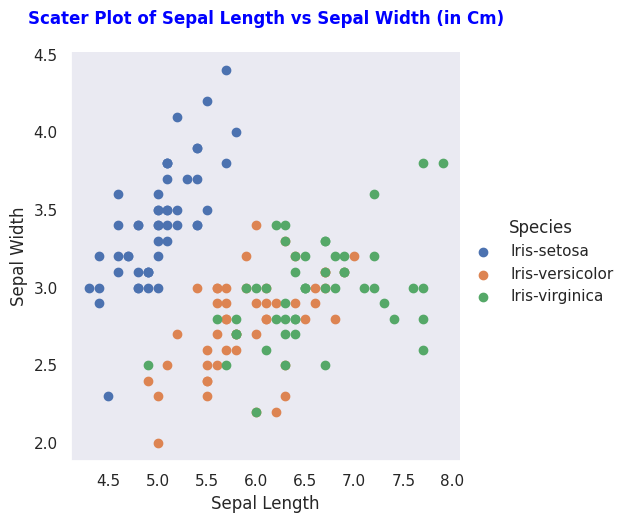

In [6]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sb.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title(title_txt, title_font, pad= 20)


Text(0.5, 1.0, 'Box Plot of Species vs Petal Length (in Cm)')

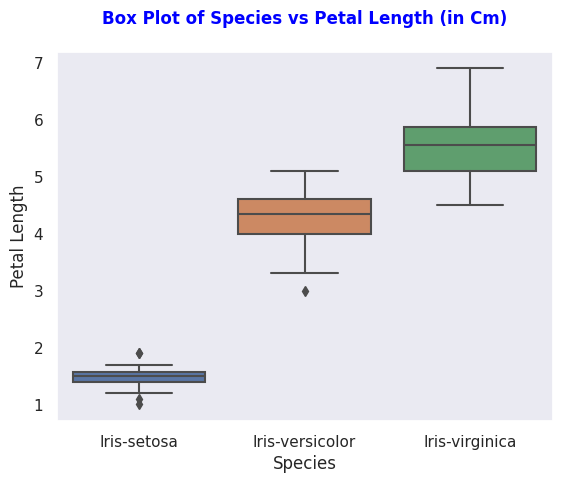

In [7]:
# We can look at an individual feature in Seaborn through a boxplot
sb.boxplot(x="Species", y="PetalLengthCm", data=iris)
plt.xlabel("Species")
plt.ylabel("Petal Length")
#plt.title("Box plot of Seble Species vs Petal Length (in Cm)")
title_txt= "Box Plot of Species vs Petal Length (in Cm)"
title_font = {'fontsize': 12, 'fontweight': 'bold', 'color': 'blue'}
plt.title(title_txt, fontdict=title_font, pad=20)




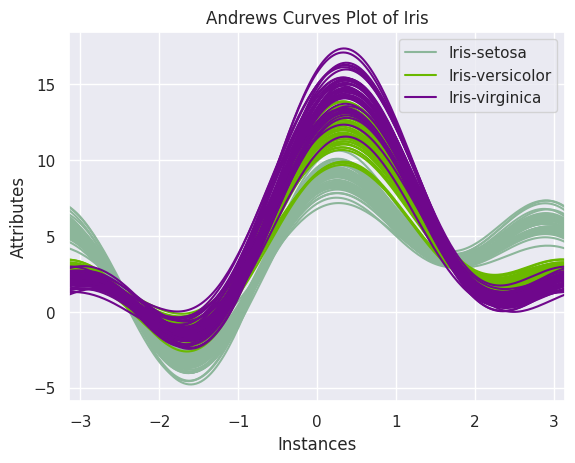

In [8]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")
plt.xlabel("Instances")
plt.ylabel("Attributes")
plt.title("Andrews Curves Plot of Iris")
plt.show()

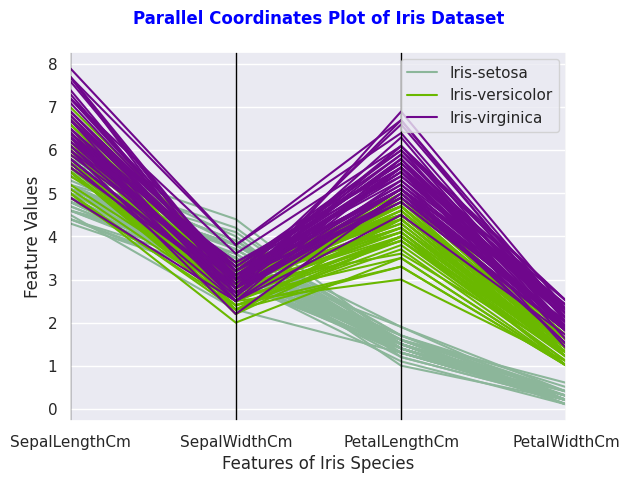

In [9]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")
plt.xlabel("Features of Iris Species")
plt.ylabel("Feature Values")

title_txt = "Parallel Coordinates Plot of Iris Dataset"
title_font = {'fontsize': 12, 'fontweight': 'bold', 'color': 'blue'}
plt.title(title_txt, title_font, pad= 20)
plt.show()



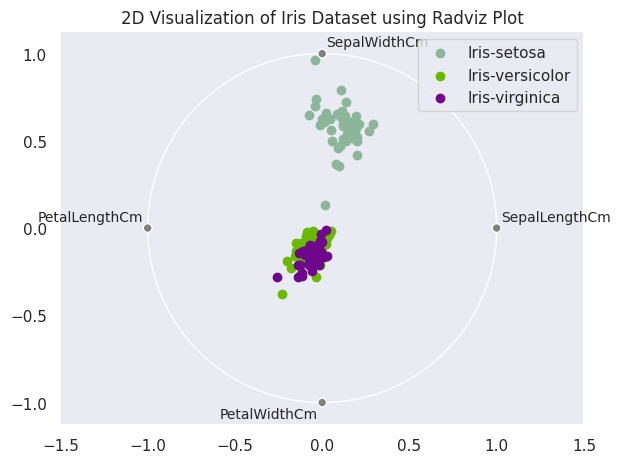

In [10]:
"""A final multivariate visualization technique pandas has is radviz
Which puts each feature as a point on a 2D plane, and then simulates
having each sample attached to those points through a spring weighted
by the relative value for that feature"""
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")
plt.title("2D Visualization of Iris Dataset using Radviz Plot")
plt.tight_layout()
plt.show()

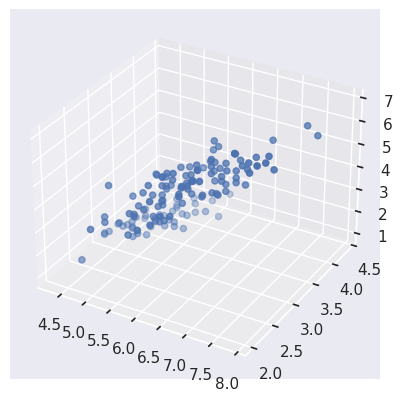

In [11]:
# Assuming you have a pandas DataFrame named 'iris' with columns 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', and 'Species'

# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three features
ax.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], iris['PetalLengthCm'], c='b', marker='o')

"""# Set labels for each axis
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

# Set title
plt.title('3D Scatter Plot of Iris Dataset')"""

# Display the plot
plt.show()


In [12]:
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(iris, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm', color='Species')

# Update layout for rotation
fig.update_layout(scene=dict(camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))))

# Display the plot in full-size window
fig.show(fullscreen=True)


In [13]:
import plotly.express as px

# Create a 3D scatter plot with a different color attribute
fig = px.scatter_3d(iris, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm', color='PetalWidthCm')

# Update layout for rotation
fig.update_layout(scene=dict(camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)))
,title = "Color indication visualize the width of Petal (in Cm)"
)
# Display the plot in full-size window
fig.show(fullscreen=True)


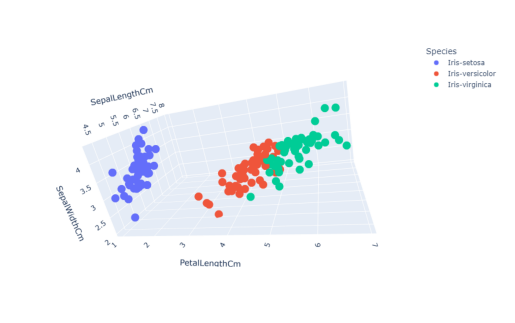

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to the image file
image_path = "/kaggle/input/3d-plot/newplot.png"

# Read the image file
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()



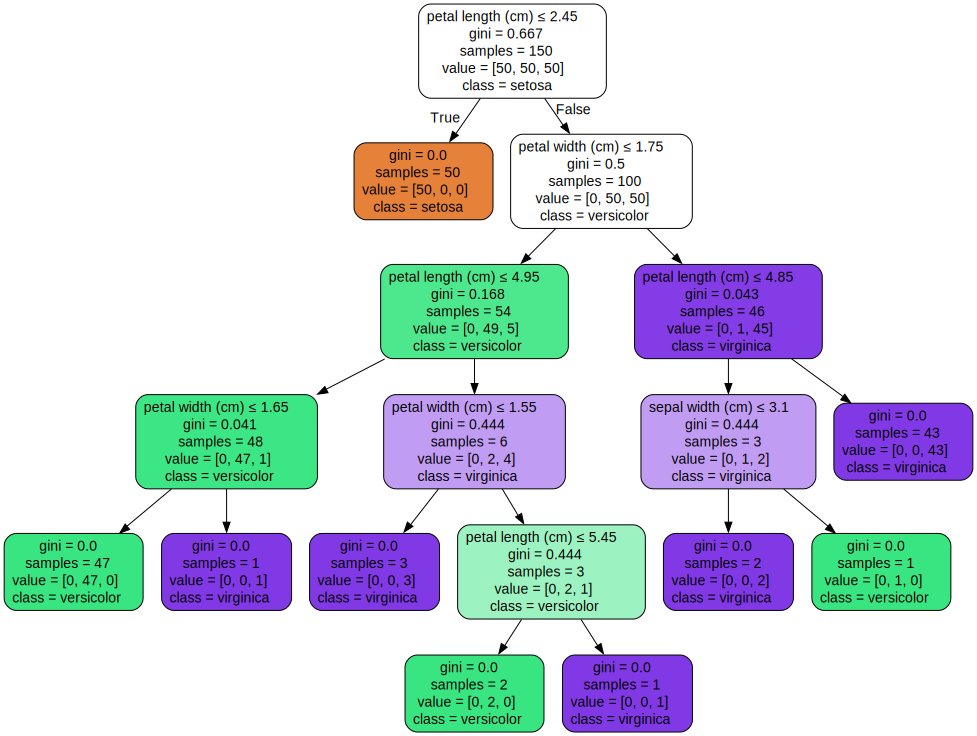

In [15]:
# Adapted from https://scikit-learn.org/stable/modules/tree.html#tree
import plotly.express as px
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data)  
graph
